In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def true(x):
  return np.sin(15*x)+x

more samples or smaller noise => it is possible to fit a higher dgree polynomial.

less samples or bigger noise => it is harder to fit any polynomial. 

In [2]:
np.random.seed(0)
samples = 300
noise = 2

In [3]:

xtrain = np.sort(np.random.rand(samples))
ytrain = true(xtrain) + np.random.randn(samples)*noise

xval = np.linspace(0, 1, 1000)
yval = true(xval)

degrees = np.arange(0, 25)
scores = np.zeros_like(degrees,dtype=float)
figsize=np.sqrt(degrees.size)


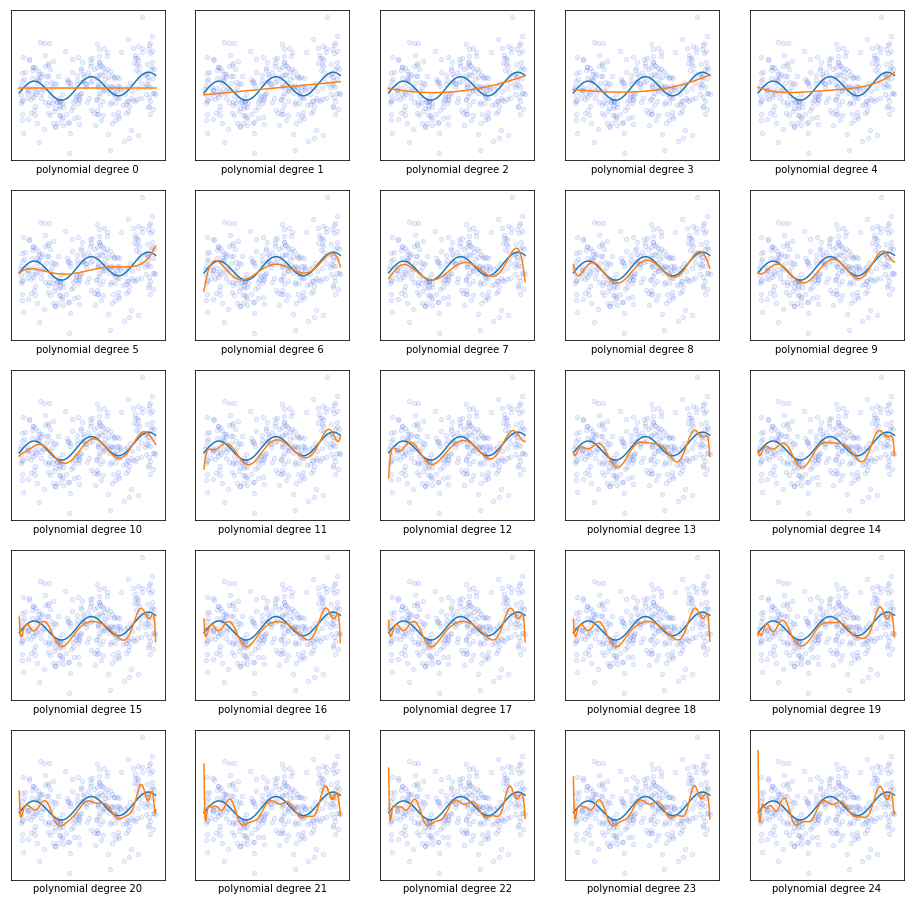

In [4]:

plt.figure(figsize=(16, 16))
for i in range(degrees.size):
    ax = plt.subplot(figsize, figsize, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynimial = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linreg = LinearRegression()
    pipe = Pipeline([("polynomial", polynimial), ("linreg", linreg)])

    pipe.fit(xtrain[:, np.newaxis], ytrain)
    scores[i] = mean_squared_error(yval, pipe.predict(xval[:, np.newaxis]))

    plt.plot(xval, yval, label="True function")
    plt.xlabel("polynomial degree {}".format(degrees[i]))
    plt.scatter(xtrain, ytrain, edgecolor='b', s=20, label="Samples",alpha=0.1)
    plt.plot(xval, pipe.predict(xval[:, np.newaxis]), label="Model")
plt.show()

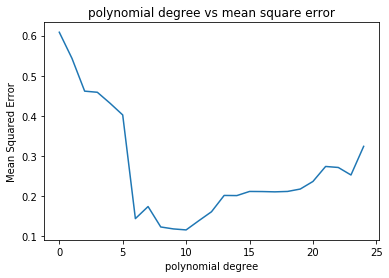

In [5]:
plt.plot(degrees, scores)
plt.xlabel('polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('polynomial degree vs mean square error')

plt.show()
